# Exploratory Data Analysis

In this notebook, EDA is carried out in order to understand the data. This will assist with feature extraction for the argumention prediction classifier.

In [1]:
# Load data from file

import json

data = []

with open('./labelled_data/1000_labelled_argument_sentences.json') as f:
    for line in f:
        json_line = json.loads(line)
        arg = {"text": json_line["content"], "label": json_line["annotation"]["labels"][0]}

        data.append(arg)

In [2]:
# Create document term matrices (dtm) and corpus

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Corpus
df_corpus = pd.DataFrame().from_dict(data, orient='columns')

# dtm without stop words
cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(df_corpus.text)
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_corpus.index

# dtm with stop words
cv_all = CountVectorizer()
df_cv_all = cv_all.fit_transform(df_corpus.text)
df_dtm_all = pd.DataFrame(df_cv_all.toarray(), columns=cv_all.get_feature_names())
df_dtm_all.index = df_corpus.index

display(df_corpus.head())
display(df_dtm.head())
display(df_dtm_all.head())

,text,label
0,"The motivation for the age restriction, like a...",arg
1,If Alexandria-Ocasio Cortez wanted to run for ...,arg
2,(Various articles I could quote to support thi...,arg
3,"Why, exactly?",not_arg
4,The minimum age requirement does at least give...,arg


,000,01,10,100,11,12,12k,15,1700,175b,...,yeah,year,years,yelling,yes,yosemighty_sam,young,younger,zero,zones
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,000,01,10,100,11,12,12k,15,1700,175b,...,yes,yet,yosemighty_sam,you,young,younger,your,yourself,zero,zones
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
# Number of arg and not_arg
number_of_arg = len(df_corpus[df_corpus["label"] == "arg"])
number_of_not_arg = len(df_corpus[df_corpus["label"] == "not_arg"])

display(number_of_arg)
display(number_of_not_arg)

516

484

## Without stop words

In [4]:
# Average number of words in each sentence of arg and not_arg 

dtm_arg = df_dtm.loc[df_corpus.index[df_corpus["label"] == "arg"].tolist()]
dtm_notarg = df_dtm.loc[df_corpus.index[df_corpus["label"] == "not_arg"].tolist()]

print("Average number of words in arg sentences")
display(dtm_arg.sum(axis=1).mean())

print("Average number of words in not_arg sentences")
display(dtm_notarg.sum(axis=1).mean())

Average number of words in arg sentences


9.267441860465116

Average number of words in not_arg sentences


5.731404958677686

In [6]:
# Most Common Words - Quantitative

display(dtm_arg.sum().sort_values(ascending=False).head(20))
display(dtm_notarg.sum().sort_values(ascending=False).head(20))

people        86
don           46
like          45
just          39
think         35
want          22
way           22
make          21
doesn         21
need          18
actually      18
years         18
know          17
health        15
person        15
time          15
government    14
change        14
better        13
point         13
dtype: int64

like            33
com             30
www             29
reddit          26
changemyview    24
https           24
people          21
just            20
think           20
don             19
message         18
appeal          18
post            17
wiki            16
things          14
delta           14
comments        14
doesn           13
view            13
really          11
dtype: int64

most common words: arg


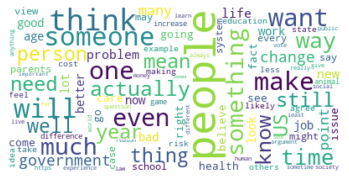

most common words: not_arg


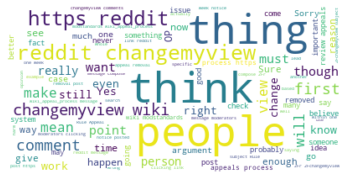

In [7]:
# Most Common Words - Visual

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud

import matplotlib.pyplot as plt

df_arg = df_corpus[df_corpus["label"] == "arg"]
df_notarg = df_corpus[df_corpus["label"] == "not_arg"]
concat_arg = " ".join(arg for arg in df_arg.text)
concat_notarg = " ".join(arg for arg in df_notarg.text)

wordcloud_arg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(concat_arg)
wordcloud_notarg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(concat_notarg)

plt.imshow(wordcloud_arg, interpolation='bilinear')
plt.axis("off")
print("most common words: arg")
plt.show()

plt.imshow(wordcloud_notarg, interpolation='bilinear')
plt.axis("off")
print("most common words: not_arg")
plt.show()

In [8]:
# Full vocabulary of dataset and number of occurances
print(pd.DataFrame(df_dtm.sum()))

                0
000             4
01              2
10              7
100             4
11              1
...            ..
yosemighty_sam  2
young           4
younger         3
zero            4
zones           1

[3267 rows x 1 columns]


## With stop words

In [9]:
# Average number of words in each sentence of arg and not_arg 

dtm_arg_all = df_dtm_all.loc[df_corpus.index[df_corpus["label"] == "arg"].tolist()]
dtm_notarg_all = df_dtm_all.loc[df_corpus.index[df_corpus["label"] == "not_arg"].tolist()]

print("Average number of words in arg sentences")
display(dtm_arg_all.sum(axis=1).mean())

print("Average number of words in not_arg sentences")
display(dtm_notarg_all.sum(axis=1).mean())

Average number of words in arg sentences


19.459302325581394

Average number of words in not_arg sentences


12.099173553719009

In [11]:
# Most Common Words - Quantitative
display(dtm_arg_all.sum().sort_values(ascending=False).head(20))
display(dtm_notarg_all.sum().sort_values(ascending=False).head(20))

the       422
to        325
and       221
of        218
that      218
is        196
you       176
in        139
it        120
are       109
for        93
be         90
people     86
not        86
have       85
but        79
or         76
on         76
as         71
they       68
dtype: int64

the      220
to       178
it       135
of       125
that     124
you      109
and      100
is        88
in        82
not       66
be        59
this      58
they      57
for       49
if        48
would     43
but       42
have      39
or        39
are       37
dtype: int64

most common words: arg


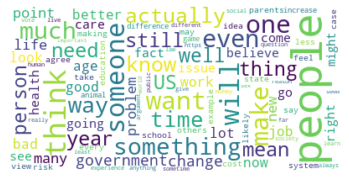

most common words: not_arg


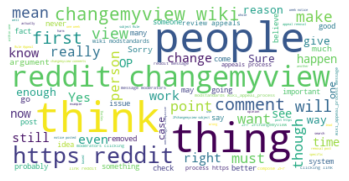

In [12]:
# Most Common Words - Visual

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud

import matplotlib.pyplot as plt

df_arg = df_corpus[df_corpus["label"] == "arg"]
df_notarg = df_corpus[df_corpus["label"] == "not_arg"]
concat_arg = " ".join(arg for arg in df_arg.text)
concat_notarg = " ".join(arg for arg in df_notarg.text)

wordcloud_arg = WordCloud(stopwords=None, max_font_size=50, max_words=100, background_color="white").generate(concat_arg)
wordcloud_notarg = WordCloud(stopwords=None, max_font_size=50, max_words=100, background_color="white").generate(concat_notarg)

plt.imshow(wordcloud_arg, interpolation='bilinear')
plt.axis("off")
print("most common words: arg")
plt.show()

plt.imshow(wordcloud_notarg, interpolation='bilinear')
plt.axis("off")
print("most common words: not_arg")
plt.show()

In [13]:
# Full vocabulary of dataset and number of occurances
print(pd.DataFrame(df_dtm.sum()))

                0
000             4
01              2
10              7
100             4
11              1
...            ..
yosemighty_sam  2
young           4
younger         3
zero            4
zones           1

[3267 rows x 1 columns]


## Fraction of sentences that contain numbers



In [15]:
def contains_numbers(text):
    return any(char.isdigit() for char in text)

print("Fraction of sentences that contain numbers: arg")
display(sum([contains_numbers(sentence) for sentence in df_corpus[df_corpus["label"] == "arg"].text.tolist()])/number_of_arg)

print("Fraction of sentences that contain numbers: not_arg")
display(sum([contains_numbers(sentence) for sentence in df_corpus[df_corpus["label"] == "not_arg"].text.tolist()])/number_of_not_arg)

Fraction of sentences that contain numbers: arg


0.09883720930232558

Fraction of sentences that contain numbers: not_arg


0.08471074380165289

### Sentiment

In [27]:
# Sentiment

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiment = [sid.polarity_scores(sentence)['compound'] for sentence in df_corpus[df_corpus["label"] == "arg"].text.tolist()]
print("Average sentiment in arg sentences")
display(sum(sentiment)/len(sentiment))

sentiment = [sid.polarity_scores(sentence)['compound'] for sentence in df_corpus[df_corpus["label"] == "not_arg"].text.tolist()]
print("Average sentiment in not_arg sentences")
display(sum(sentiment)/len(sentiment))


Average number of words in arg sentences


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/effsy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.03318255813953488

Average number of words in not_arg sentences


0.0015305785123966903

### PoS

In [81]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

import numpy
from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

pos_counts_arg = []

for sentence in df_corpus[df_corpus["label"] == "arg"].text.tolist():
    nn = 0
    vb = 0
    jj = 0
    for word, pos in pos_tag(word_tokenize(sentence)):
        if pos.startswith('NN'):
            nn += 1
        elif pos.startswith('VB'):
            vb += 1
        elif pos.startswith('JJ'):
            jj += 1
            
    pos_counts_arg.append([nn, vb, jj])


pos_counts_arg = numpy.mean(pos_counts_arg, axis=0)

print("Average number of PoS of NN (Nouns), VB (Verbs), JJ (Adjectives) in arg sentences")
print(pos_counts_arg)
print("Normalised")
print(normalize([pos_counts_arg], norm='l1'))

pos_counts_notarg = []

for sentence in df_corpus[df_corpus["label"] == "not_arg"].text.tolist():
    nn = 0
    vb = 0
    jj = 0
    for word, pos in pos_tag(word_tokenize(sentence)):
        if pos.startswith('NN'):
            nn += 1
        elif pos.startswith('VB'):
            vb += 1
        elif pos.startswith('JJ'):
            jj += 1
            
    pos_counts_notarg.append([nn, vb, jj])

pos_counts_notarg = numpy.mean(pos_counts_notarg, axis=0)

print("Average number of PoS of NN (Nouns), VB (Verbs), JJ (Adjectives) in not_arg sentences")
print(pos_counts_notarg)
print("Normalised")
print(normalize([pos_counts_notarg], norm='l1'))

Average number of PoS of NN (Nouns), VB (Verbs), JJ (Adjectives) in arg sentences
[4.86434109 4.1124031  1.82170543]
Normalised
[[0.45046662 0.38083274 0.16870065]]
Average number of PoS of NN (Nouns), VB (Verbs), JJ (Adjectives) in not_arg sentences
[2.85123967 2.5661157  0.89876033]
Normalised
[[0.45142296 0.40628067 0.14229637]]
